# Assignment 2 - Classification and Regression

## Deadline: Thursday, October 10 at 11:59 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

## Marks:
- Classification: 5 marks
- Regression: 5 marks

**Total: 10 marks**


## Classification

The first part of the assignment is dedicated to a binary classification problem. You will use the [Parkinson Disease Detection](https://www.kaggle.com/datasets/jainaru/parkinson-disease-detection/data) dataset from kaggle to discriminate healthy people from those with Parkinson's Disease using features extracted from voice recordings.



### Marks:
- Step 1. Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.
- Step 2. Create training and test sets and scale data. 0.5 marks.

For the next three steps, select three different machine learning classifiers implemented in Scikit-Learn. You can select from linear perceptron classifier, logistic regression classifier, any type of support vector classifiers (including with the kernel trick), a decision tree and/or a random forest. You may also use any other classifier introduced in the course.
- Step 3. Train the first model, then evaluate the performance using at least accuracy, sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class 0). Also, display the confusion matrix with Matplotlib or Seaborn. Any other visualizations of the model are optional. 1 mark.
- Step 4. Repeat step 3 for the second model. 1 mark.
- Step 5. Repeat step 3 for the third model. 1 mark.
- Step 6. Provide a brief discussion on why you selected particular models, how the performance varied between models, which model you believe is the most generalizable, and any issues or problems you encountered (200 words max). 1 mark.

**Total = 5 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Context


Parkinson's Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.



### Data


This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

### Imports

In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data dictionary




- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation'

### Step 1: Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.

In [23]:
# The downloaded file PD.csv contains data in a CSV (comma-separated values) formatted text file.

# Load the dataset using pandas
df = pd.read_csv('PD.csv')

# Display the first few rows
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [24]:
# Explore the dataset

# Check for missing values (hint: check out isnull() or df.info() in pandas)
df.isnull().sum()

# Impute missing values if you find any (you can adapt your code from Assignment1 to do so)
# your code here

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [25]:
# The 'name' is not necessary - exclude it from the dataframe (hint: remember the drop() method in pandas)
df.drop('name', axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
# Create feature matrix and target array
# .values will take labels off, leave values(because pandas dataframe has row indexes, column names)
X = df.drop('status', axis=1).values
y = df.status.values  # The target array is the 'status' column

### Step 2: Create training and test sets and scale data. 0.5 marks.

In [27]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Note that we are not standardizing the whole dataset, but we are fitting the scaler on the training set, then applying it to the training and test set. This is to avoid data leakage.

In [28]:
# Standardize data
# Complete the code below

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training set
X_train = scaler.transform(X_train)  # Transform the training set
X_test = scaler.transform(X_test) # Apply the scaler transformation on the test set

### Step 3: Train the first model, then evaluate the performance using at least accuracy, sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class 0). Also, display the confusion matrix with Matplotlib or Seaborn. Any other visualizations of the model are optional. 1 mark.


Perceptron: 
F1:  0.78
Accuracy: 0.69
Sensitivity: 0.72
Specificity: 0.6


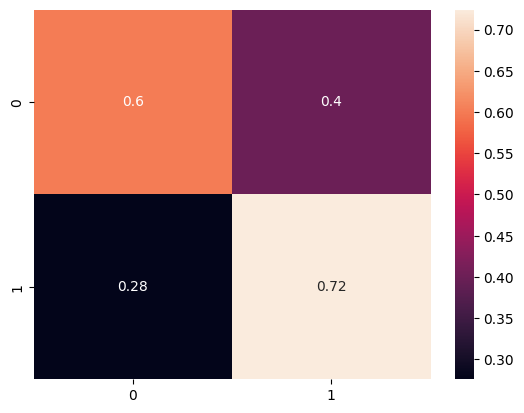

In [29]:
# Train the first model, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
# Also, display the confusion matrix with Matplotlib or Seaborn.
from sklearn import metrics
import seaborn as sns

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #pos_label =1 recalls for positive(sensitivity); pos_label =0 recalls for negative(specificity)
    F1 = metrics.f1_score(y_test, y_pred)
    acury = metrics.accuracy_score(y_test, y_pred)
    sens = metrics.recall_score(y_test, y_pred, pos_label=1)
    spec = metrics.recall_score(y_test, y_pred, pos_label=0)


    print('F1: ', round(F1,2))
    print('Accuracy:', round(acury,2))
    print('Sensitivity:', round(sens,2))
    print('Specificity:', round(spec,2))

    #Use normalize = 'true' to change numbers in the table to ratio
    cm = metrics.confusion_matrix(y_test, y_pred, normalize = 'true')
    sns.heatmap(cm, annot=True)
    plt.show()


#Perceptron
from sklearn.linear_model import Perceptron
model = Perceptron()
print('Perceptron: ')
train_and_evaluate(model, X_train, y_train, X_test, y_test)



### Step 4: Repeat step 3 for the second model. 1 mark.

Logistic Regression: 
F1:  0.86
Accuracy: 0.79
Sensitivity: 0.83
Specificity: 0.7


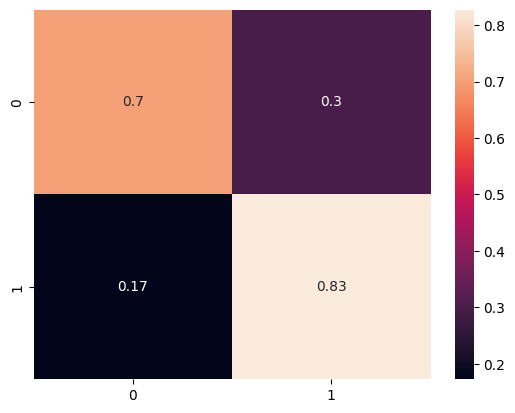

In [30]:
# Train the second model, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
# Also, display the confusion matrix with Matplotlib or Seaborn.

#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print('Logistic Regression: ')
train_and_evaluate(model, X_train, y_train, X_test, y_test)

### Step 5: Repeat step 3 for the third model. 1 mark.

Support Vector Classifier: 
F1:  0.95
Accuracy: 0.92
Sensitivity: 1.0
Specificity: 0.7


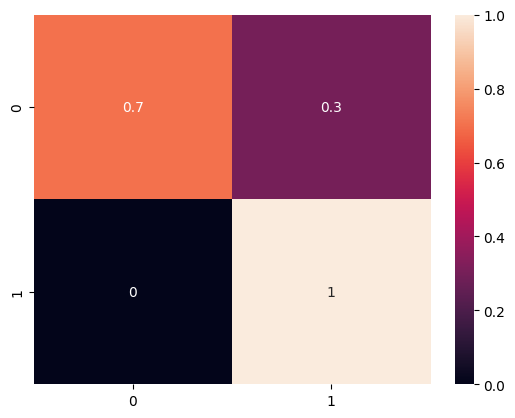

In [31]:
# Train the third model, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
# Also, display the confusion matrix with Matplotlib or Seaborn.

#support Vector Classifier
from sklearn.svm import SVC
model = SVC()
print('Support Vector Classifier: ')
train_and_evaluate(model, X_train, y_train, X_test, y_test)

### Step 6: Provide a brief discussion on why you selected particular models, how the performance varied between models, which model you believe is the most generalizable, and any issues or problems you encountered (200 words max). 1 mark.

**I assume that the data is linearly separable because I tried using Kernel SVC to test the model and found that the results were the same as those of SVC. As a result, I chose to use only the Perceptron, Logistic Regression, and Support Vector Classification models to test performance. In my opinion, SVC is the best model in terms of generalization, as reflected by the F1 score of 0.95. I found it challenging to include Kernel SVC in the same function shared by the three models to handle all four models in a single function, but I will do more research on this. **

## Regression

The second part of the assignment is dedicated to regression. You will use the [Medical Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance) dataset from kaggle to predict the healthcare insurance costs of patients in the US.

### Marks:
- Step 1. Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.
- Step 2. Create training and test sets and scale data. 0.5 marks.
- Step 3. Implement Linear Ridge Regression and evaluate performance. 1 mark
- Step 4. Implement Polynomial Ridge Regression and evaluate performance. 1 mark.
- Step 5. Implement Kernel Ridge Regression and evaluate performance. 1 mark.
- Step 6. Plot expected targets of the test set on the x axis and predicted targets on the y axis and overlay with the line `y_test = y_pred`. You can follow the example in  notebook `4.3-Nonlinear-regression`. 0.5 marks
- Step 7. Discuss the performance of the models and any issues or problems you encountered (200 words max). 0.5 marks.

**Total = 5 marks.**


**Notes**

This exercise is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. Feel free to write reusable functions to share among steps; however, this is not required.

### Content

This public dataset was cleaned to match the format presented in the book "Machine Learning with R" by Brett Lantz. The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

### Imports

In [32]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Dictionary


- `age`: age of primary beneficiary - numerical

- `sex`: insurance contractor gender: female/male - categorical

- `bmi`: Body mass index - numerical

- `children`: Number of children covered by health insurance / Number of dependents - numerical

- `smoker`: yes/no - categorical

- `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest - categorical

- `charges`: Individual medical costs billed by health insurance - numerical



### Step 1: Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.

In [33]:
# The downloaded file insurance.csv contains data in a CSV (comma-separated values) formatted text file.

# Load the dataset using pandas
df = pd.read_csv('insurance.csv')

# Display the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# Explore the dataset

# Check for missing values (hint: check out isnull() or df.info() in pandas)
# Note that the missing values could be 0 or NaN - pay attention to this
# Use a dictionary to organize: keys as the title of columns, values as the data of each column
pd.DataFrame({
    'NaN_count': df.isnull().sum(),
    'Zero_count': (df==0).sum()
})

,NaN_count,Zero_count
age,0,0
sex,0,0
bmi,0,0
children,0,574
smoker,0,0
region,0,0
charges,0,0


In [35]:
# Remove samples containing missing values if you find any
# There's no missing values in the dataset. Zeros for the 'children' category means no dependents.

Let's convert the categorical variables (yes/no, female/male, etc.) into numerical variables. Have a look at pandas `replace()` or `get_dummies()` methods. Hint: use `dtype=int` in `get_dummies()`. [Here](https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/) is an example.

In [36]:
# Convert categorical to numeric
# Convert yes/no and male/female variables with 'replace()'
df['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)
df['smoker'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

# Convert 'region' column with 'get_dummies()'
# get_dummies() creates binary indicator columns for each category in 'region'.
dummies = pd.get_dummies(df['region'], dtype=int)  # Get the dummy columns
merged = pd.concat([df, dummies], axis=1)  # Concatenate dummy columns with dataframe, axis = 1 means concatenate them side by side
# Drop the 'region' column and one of the dummies from 'merged' to avoid redundancy
#-> Since you know someone who's not from southwest, southeast, and northwest, then he must from northeast.
df = merged.drop(['region', 'northeast'], axis=1)

df.head()

/tmp/ipython-input-3401201619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace(['female', 'male'],
/tmp/ipython-input-3401201619.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace(['female', 'male'],
/tmp/ipython-input-3401201619.py:5: FutureWarning: A value i

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [37]:
# Create feature matrix and target array
#Convert dataframe object into a numpy array, no need to reshape() since X is already a 2D array
X = df.drop('charges', axis=1).to_numpy()

# Create the target array
y = df.charges.to_numpy()  # The target array is the 'charges' column

print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


### Step 2: Create training and test sets and scale data. 0.5 marks.

In [38]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [39]:
# Standardize data
# Complete the code below

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Use the scaler.fit_transfrom() method to combine fit and transform for training data
#Training data: fit_transform (learn statistics + scale).
#Test data: only transform (use training’s statistics) to avoid data leakage.
X_train = scaler.fit_transform(X_train)  # Fit and Transform the training set
X_test = scaler.transform(X_test)  # Apply the scaler transformation on the test set

### Step 3: Implement Linear Ridge Regression and evaluate performance. 1 mark

In [40]:
# Linear Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

#Build r2 and RMSE functions
def scores(model, X, y):
  y_pred = model.predict(X)
  r2 = r2_score(y, y_pred)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  print('r2:', round(r2,2))
  print('RMSE:', round(rmse,2))
  return r2, rmse

# Grid for hyperparameter alpha
parameters = {"alpha": np.logspace(-3,3,7)}

# Create ridge model
model = Ridge()

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimised model
model_lin = grid_search.best_estimator_

# Calculate r2 and RMSE on the test set
r2, rmse = scores(model_lin, X_test, y_test)

r2: 0.8
RMSE: 5652.35


### Step 4: Implement Polynomial Ridge Regression and evaluate performance. 1 mark.

In [42]:
# Polynomial Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create model with Pipeline
model = Pipeline((
("poly_features", PolynomialFeatures(include_bias=False)),
("scaler", StandardScaler()),
("ridge", Ridge())))

# Define parameter grid
parameters = {"poly_features__degree": range(1, 6),
             "ridge__alpha": np.logspace(-3, 3, 10)}

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimised model
model_poly = grid_search.best_estimator_

# Calculate r2 and RMSE on the test set
r2, rmse = scores(model_lin, X_test, y_test)

r2: 0.8
RMSE: 5652.35


### Step 5: Implement Kernel Ridge Regression and evaluate performance. 1 mark.

In [43]:
# Kernel Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.kernel_ridge import KernelRidge

# Create model
model = KernelRidge(kernel = 'rbf')

# Define parameter grid
parameters = {"alpha": np.logspace(-3, 3, 11),
              "gamma": np.logspace(-3, 3, 11)}

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimised model
model_kernel = grid_search.best_estimator_

# Calculate r2 and RMSE on the test set
r2, rmse = scores(model_kernel, X_test, y_test)

r2: 0.88
RMSE: 4353.37


### Step 6: Plot expected targets of the test set on the x axis and predicted targets on the y axis and overlay with the line `y_test = y_pred`. You can follow the example in the notebook dedicated to nonlinear regression. 0.5 marks

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-4292073897.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.plot([0, 60000], [0, 60000], 'r', label = '$y=\hat{y}$')


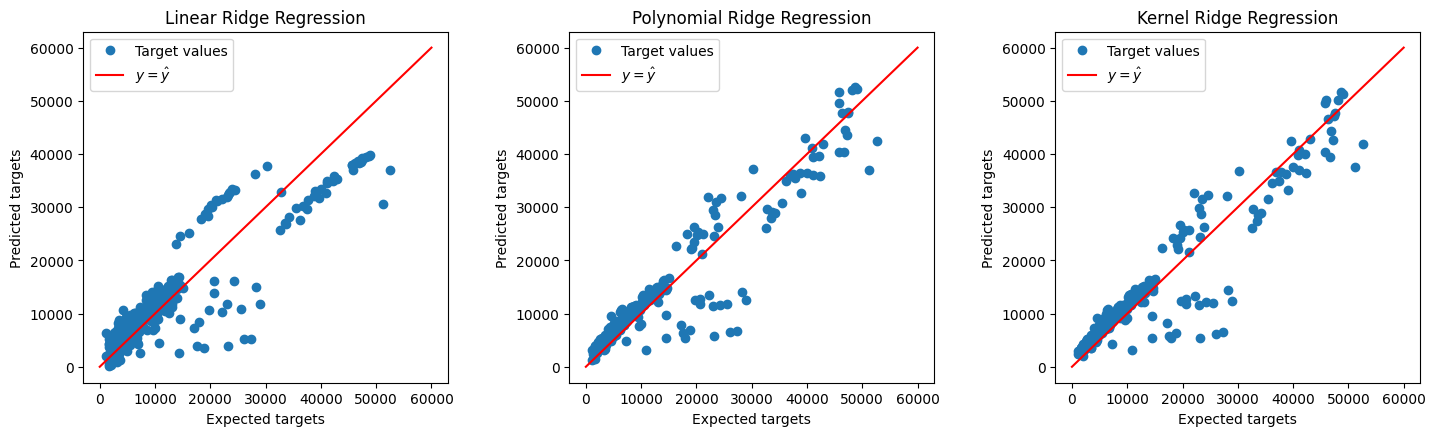

In [48]:
# Plot targets

# Imports
from matplotlib.pyplot import subplot

#Helper function
def plot_targets(model, X, y):
  y_pred = model.predict(X)

  # Plot expected targets on x axis and predicted targets on y axis
  plt.plot(y, y_pred, 'o', label = 'Target values')
  #Perfect prediction line
  plt.plot([0, 60000], [0, 60000], 'r', label = '$y=\hat{y}$')
  plt.xlabel('Expected targets')
  plt.ylabel('Predicted targets')
  plt.legend()

#figsize controls the size of figures
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Linear Ridge
#.sca means Set Current Axes
plt.sca(axes[0])
plot_targets(model_lin, X_test, y_test)
plt.title('Linear Ridge Regression')

#Polynomial Ridge
plt.sca(axes[1])
plot_targets(model_poly, X_test, y_test)
plt.title('Polynomial Ridge Regression')

#Kernel Ridge
plt.sca(axes[2])
plot_targets(model_kernel, X_test, y_test)
plt.title('Kernel Ridge Regression')

#greater pad, larger margins between figures
plt.tight_layout(pad=3.0)
plt.show()


### Step 7: Discuss the performance of the models and any issues or problems you encountered (200 words max). 0.5 marks.

**The Linear Ridge Regression model provided a baseline performance, but it is obvious that the model cannot handle more complex patterns. Polynomial Ridge Regression has better fit compared to Linear Ridge Regression; however, it might overfit when the polynomial degree is too high. As for Kernel Ridge Regression, I think that is the best of the three. The problem that I encountered was plotting figures. The layout of the three figures was too cramped that I couldn't even clearly see the distribution of data points. Eventually, I used "figsize" to restrict the size of the figures and "pad" to adjust distance among figures.**